In [2]:
import empyrical as ep
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_ta as ta
import pyfolio as pf
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import yfinance as yf

import datetime
import warnings
import pytz

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

plt.style.use("tableau-colorblind10")
%matplotlib inline

c:\Users\HP Victus 16\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [3]:
df = pd.read_csv("sentiment_score.csv")

In [4]:
df

,BaroId,CreateDate,Baro_Index,DateTime_T4
0,44D564F4-D0A8-4F68-A7D0-94A7FCEFE985,19/08/2016,42.810000,25/08/2016
1,67A99050-2507-4C3C-8992-2E24C481AD9C,22/08/2016,9.420000,26/08/2016
2,B859C25E-0FD9-4EC7-867A-D4DDBA4F3CFE,23/08/2016,13.720000,29/08/2016
3,200F93C4-D4BB-4E00-8EC3-E36499C5CC9D,24/08/2016,3.030000,30/08/2016
4,1E311B1D-1096-4BF9-BFD8-0F7032499E20,25/08/2016,4.260000,31/08/2016
...,...,...,...,...
1881,6618AE52-3E77-4194-ADAD-C7AE1C616EEC,17/06/2024,58.470000,21/06/2024
1882,26C66803-9BFF-4CD6-B6B7-0D46685B4BD9,18/06/2024,39.160000,24/06/2024
1883,47B3016D-ED34-4662-AB31-136FA86858CF,19/06/2024,59.850000,25/06/2024
1884,6ACC66BE-9159-4A08-A2B8-E369542716FB,20/06/2024,64.070000,26/06/2024


In [5]:
df['Close'] = df['Baro_Index']

In [6]:
df

,BaroId,CreateDate,Baro_Index,DateTime_T4,Close
0,44D564F4-D0A8-4F68-A7D0-94A7FCEFE985,19/08/2016,42.810000,25/08/2016,42.810000
1,67A99050-2507-4C3C-8992-2E24C481AD9C,22/08/2016,9.420000,26/08/2016,9.420000
2,B859C25E-0FD9-4EC7-867A-D4DDBA4F3CFE,23/08/2016,13.720000,29/08/2016,13.720000
3,200F93C4-D4BB-4E00-8EC3-E36499C5CC9D,24/08/2016,3.030000,30/08/2016,3.030000
4,1E311B1D-1096-4BF9-BFD8-0F7032499E20,25/08/2016,4.260000,31/08/2016,4.260000
...,...,...,...,...,...
1881,6618AE52-3E77-4194-ADAD-C7AE1C616EEC,17/06/2024,58.470000,21/06/2024,58.470000
1882,26C66803-9BFF-4CD6-B6B7-0D46685B4BD9,18/06/2024,39.160000,24/06/2024,39.160000
1883,47B3016D-ED34-4662-AB31-136FA86858CF,19/06/2024,59.850000,25/06/2024,59.850000
1884,6ACC66BE-9159-4A08-A2B8-E369542716FB,20/06/2024,64.070000,26/06/2024,64.070000


In [7]:
df['EMA-2'] = df.ta.ema(lenth=2)
df['EMA-3'] = df.ta.ema(lenth=3)
df['EMA-5'] = df.ta.ema(lenth=5)
df['EMA-8'] = df.ta.ema(lenth=8)

df['SMA-2'] = df.ta.sma(length=2)
df['SMA-3'] = df.ta.sma(length=3)
df['SMA-5'] = df.ta.sma(length=5)
df['SMA-8'] = df.ta.sma(length=8)

In [8]:
df

,BaroId,CreateDate,Baro_Index,DateTime_T4,Close,EMA-2,EMA-3,EMA-5,EMA-8,SMA-2,SMA-3,SMA-5,SMA-8
0,44D564F4-D0A8-4F68-A7D0-94A7FCEFE985,19/08/2016,42.810000,25/08/2016,42.810000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,67A99050-2507-4C3C-8992-2E24C481AD9C,22/08/2016,9.420000,26/08/2016,9.420000,NaN,NaN,NaN,NaN,26.115000,NaN,NaN,NaN
2,B859C25E-0FD9-4EC7-867A-D4DDBA4F3CFE,23/08/2016,13.720000,29/08/2016,13.720000,NaN,NaN,NaN,NaN,11.570000,21.983333,NaN,NaN
3,200F93C4-D4BB-4E00-8EC3-E36499C5CC9D,24/08/2016,3.030000,30/08/2016,3.030000,NaN,NaN,NaN,NaN,8.375000,8.723333,NaN,NaN
4,1E311B1D-1096-4BF9-BFD8-0F7032499E20,25/08/2016,4.260000,31/08/2016,4.260000,NaN,NaN,NaN,NaN,3.645000,7.003333,14.648000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,6618AE52-3E77-4194-ADAD-C7AE1C616EEC,17/06/2024,58.470000,21/06/2024,58.470000,53.811157,53.811157,53.811157,53.811157,52.980000,56.293333,53.322000,54.583750
1882,26C66803-9BFF-4CD6-B6B7-0D46685B4BD9,18/06/2024,39.160000,24/06/2024,39.160000,51.147311,51.147311,51.147311,51.147311,48.815000,48.373333,51.982000,48.883750
1883,47B3016D-ED34-4662-AB31-136FA86858CF,19/06/2024,59.850000,25/06/2024,59.850000,52.729618,52.729618,52.729618,52.729618,49.505000,52.493333,53.578000,49.907500
1884,6ACC66BE-9159-4A08-A2B8-E369542716FB,20/06/2024,64.070000,26/06/2024,64.070000,54.791505,54.791505,54.791505,54.791505,61.960000,54.360000,53.808000,53.711250


In [9]:
df.dropna(inplace=True)

In [10]:
df

,BaroId,CreateDate,Baro_Index,DateTime_T4,Close,EMA-2,EMA-3,EMA-5,EMA-8,SMA-2,SMA-3,SMA-5,SMA-8
9,DC123054-E4E2-40F6-9B92-ED6985A59CCA,01/09/2016,3.78,07/09/2016,3.78,14.761000,14.761000,14.761000,14.761000,24.110,17.820000,14.874,11.92250
10,0A7E952F-E4B9-43C6-B4A0-4A60F6B1AFC0,02/09/2016,4.60,08/09/2016,4.60,12.913545,12.913545,12.913545,12.913545,4.190,17.606667,14.324,10.78250
11,2A591594-DD9B-4ECB-B5F3-F83722DD0055,05/09/2016,5.20,09/09/2016,5.20,11.511083,11.511083,11.511083,11.511083,4.900,4.526667,12.652,11.05375
12,8B22FFC1-4989-456E-82E5-A0FC8BC7F81C,06/09/2016,85.88,12/09/2016,85.88,25.032704,25.032704,25.032704,25.032704,45.540,31.893333,28.780,21.25625
13,B54D5E03-0F7B-40C5-95F6-840406D0966D,07/09/2016,98.41,13/09/2016,98.41,38.374031,38.374031,38.374031,38.374031,92.145,63.163333,39.574,32.63875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,FB474C47-DDAD-4781-9825-7A938C866A93,14/06/2024,47.49,20/06/2024,47.49,52.775859,52.775859,52.775859,52.775859,55.205,54.093333,48.356,53.24250
1881,6618AE52-3E77-4194-ADAD-C7AE1C616EEC,17/06/2024,58.47,21/06/2024,58.47,53.811157,53.811157,53.811157,53.811157,52.980,56.293333,53.322,54.58375
1882,26C66803-9BFF-4CD6-B6B7-0D46685B4BD9,18/06/2024,39.16,24/06/2024,39.16,51.147311,51.147311,51.147311,51.147311,48.815,48.373333,51.982,48.88375
1883,47B3016D-ED34-4662-AB31-136FA86858CF,19/06/2024,59.85,25/06/2024,59.85,52.729618,52.729618,52.729618,52.729618,49.505,52.493333,53.578,49.90750


In [11]:
columns_to_analyze = ['Close', 'EMA-2', 'EMA-3', 'EMA-5', 'EMA-8', 'SMA-2', 'SMA-3', 'SMA-5', 'SMA-8']

# Initialize a dictionary to store the results
results = {}

# Calculate statistics for each column
for column in columns_to_analyze:
    avg = df[column].mean()
    sd = df[column].std()
    stats = {
        'std': df[column].std(),
        'mean': df[column].mean(),
        'sum': df[column].sum(),
        'count': df[column].count(),
        '+05sd': avg + 0.5 * sd,
        '+1sd': avg + 1 * sd,
        '+15sd': avg + 1.5 * sd,
        '-05sd': avg - 0.5 * sd,
        '-1sd': avg - 1 * sd,
        '-15sd': avg - 1.5 * sd,
    }
    results[column] = stats

results_df = pd.DataFrame(results).transpose()

# Display the results
print(results_df)

             std       mean            sum   count      +05sd       +1sd  \
Close  12.860392  54.864739  102926.250000  1876.0  61.294935  67.725131   
EMA-2   5.787415  54.774570  102757.093725  1876.0  57.668278  60.561986   
EMA-3   5.787415  54.774570  102757.093725  1876.0  57.668278  60.561986   
EMA-5   5.787415  54.774570  102757.093725  1876.0  57.668278  60.561986   
EMA-8   5.787415  54.774570  102757.093725  1876.0  57.668278  60.561986   
SMA-2   9.746446  54.859507  102916.435000  1876.0  59.732730  64.605953   
SMA-3   8.473947  54.848060  102894.960000  1876.0  59.085033  63.322007   
SMA-5   7.243086  54.827994  102857.316000  1876.0  58.449536  62.071079   
SMA-8   6.369788  54.792433  102790.603750  1876.0  57.977327  61.162220   

           +15sd      -05sd       -1sd      -15sd  
Close  74.155327  48.434543  42.004347  35.574150  
EMA-2  63.455693  51.880862  48.987155  46.093447  
EMA-3  63.455693  51.880862  48.987155  46.093447  
EMA-5  63.455693  51.880862  48

In [12]:
results_df

,std,mean,sum,count,+05sd,+1sd,+15sd,-05sd,-1sd,-15sd
Close,12.860392,54.864739,102926.250000,1876.0,61.294935,67.725131,74.155327,48.434543,42.004347,35.574150
EMA-2,5.787415,54.774570,102757.093725,1876.0,57.668278,60.561986,63.455693,51.880862,48.987155,46.093447
EMA-3,5.787415,54.774570,102757.093725,1876.0,57.668278,60.561986,63.455693,51.880862,48.987155,46.093447
EMA-5,5.787415,54.774570,102757.093725,1876.0,57.668278,60.561986,63.455693,51.880862,48.987155,46.093447
EMA-8,5.787415,54.774570,102757.093725,1876.0,57.668278,60.561986,63.455693,51.880862,48.987155,46.093447
SMA-2,9.746446,54.859507,102916.435000,1876.0,59.732730,64.605953,69.479177,49.986284,45.113060,40.239837
SMA-3,8.473947,54.848060,102894.960000,1876.0,59.085033,63.322007,67.558980,50.611086,46.374113,42.137139
SMA-5,7.243086,54.827994,102857.316000,1876.0,58.449536,62.071079,65.692622,51.206451,47.584908,43.963365
SMA-8,6.369788,54.792433,102790.603750,1876.0,57.977327,61.162220,64.347114,51.607539,48.422645,45.237751


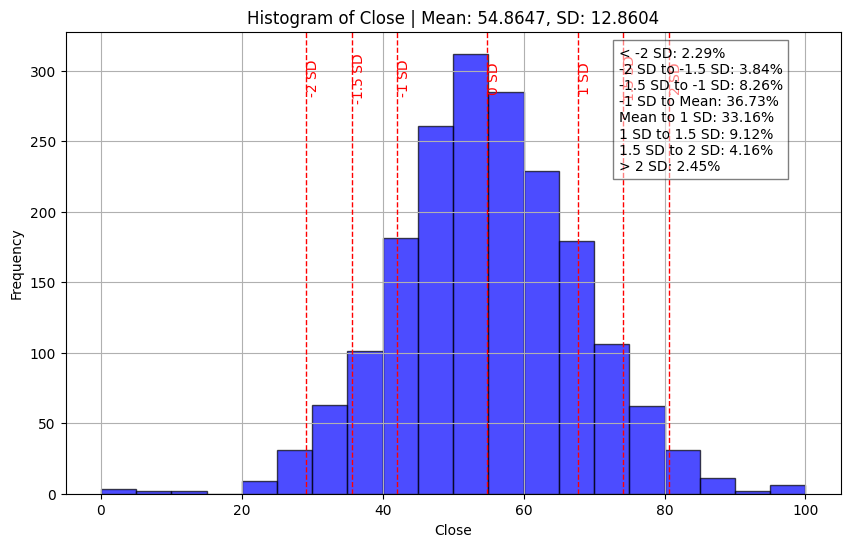

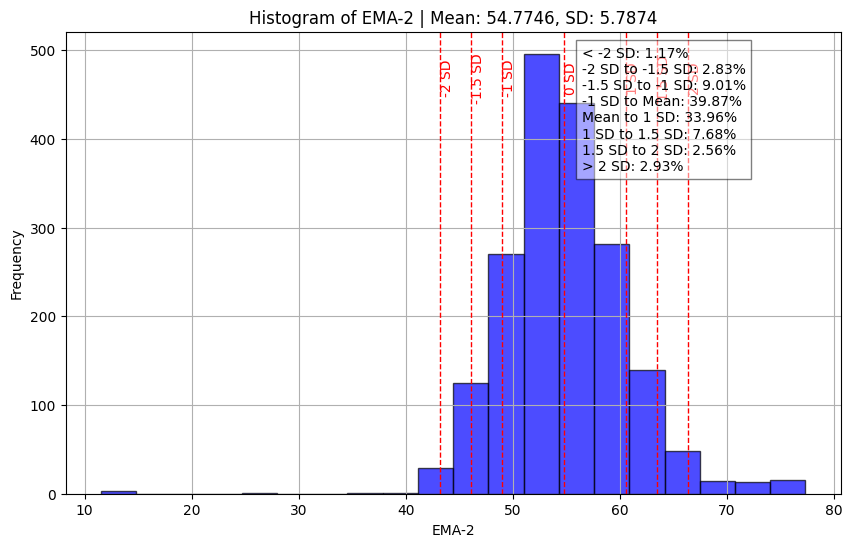

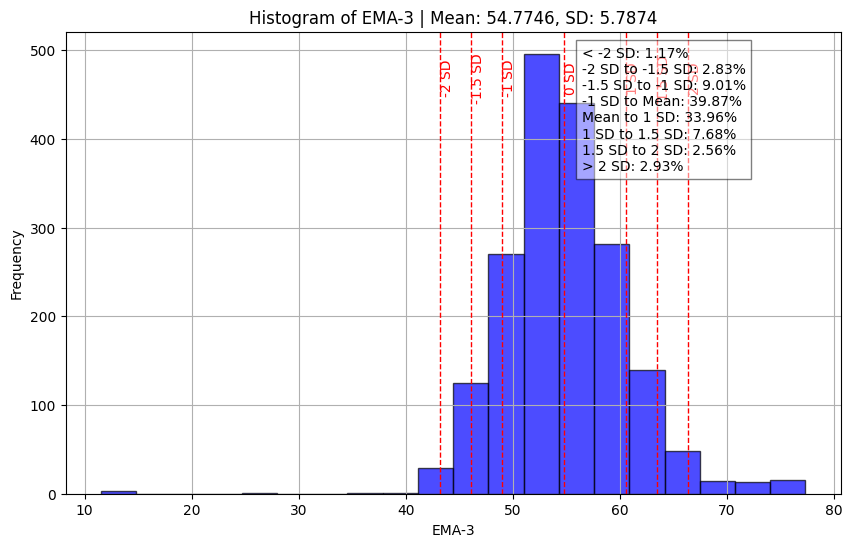

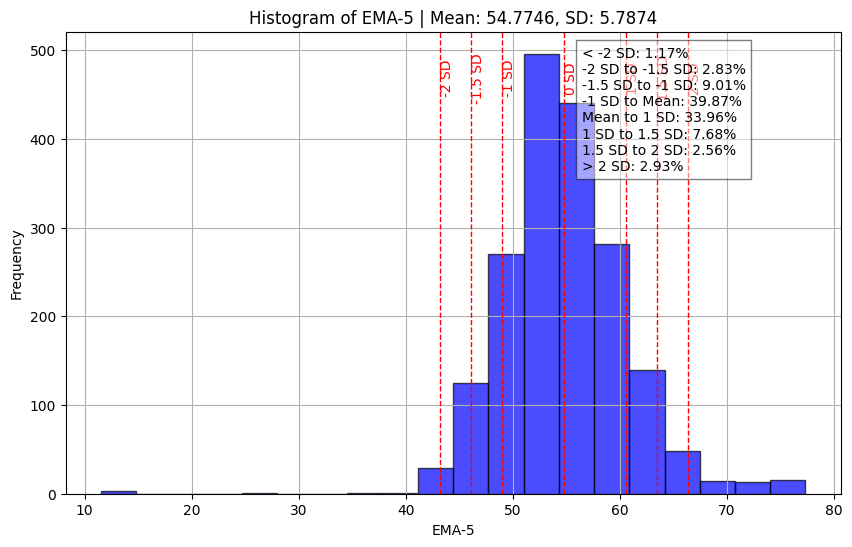

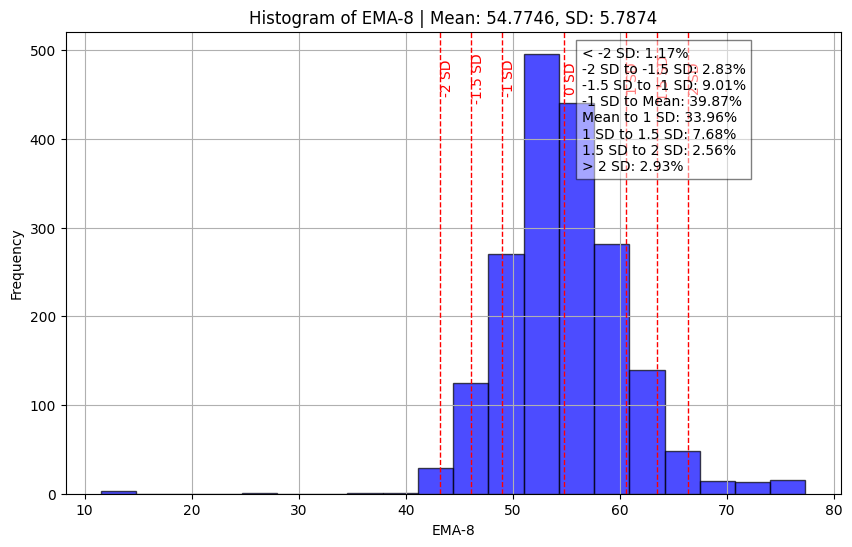

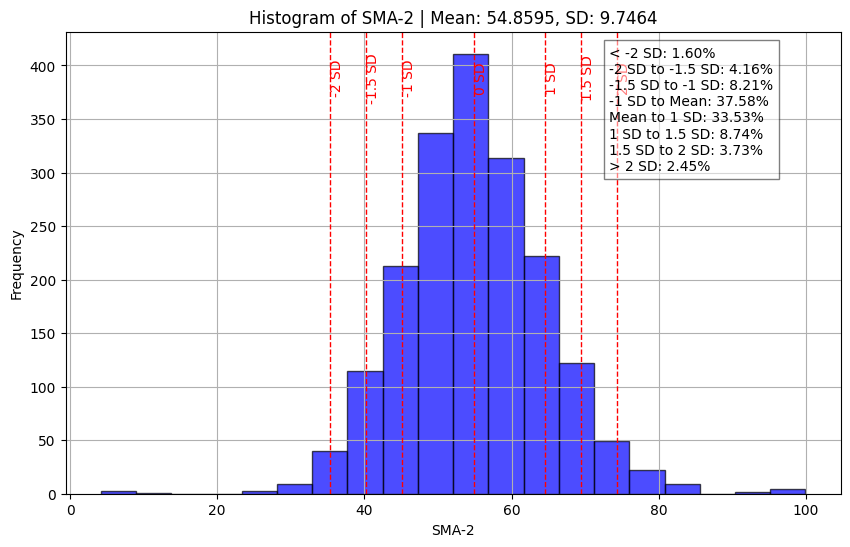

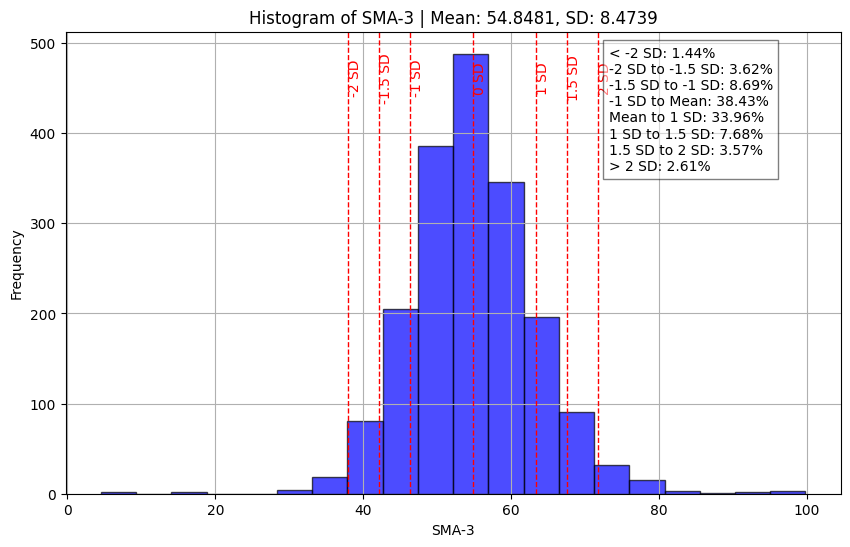

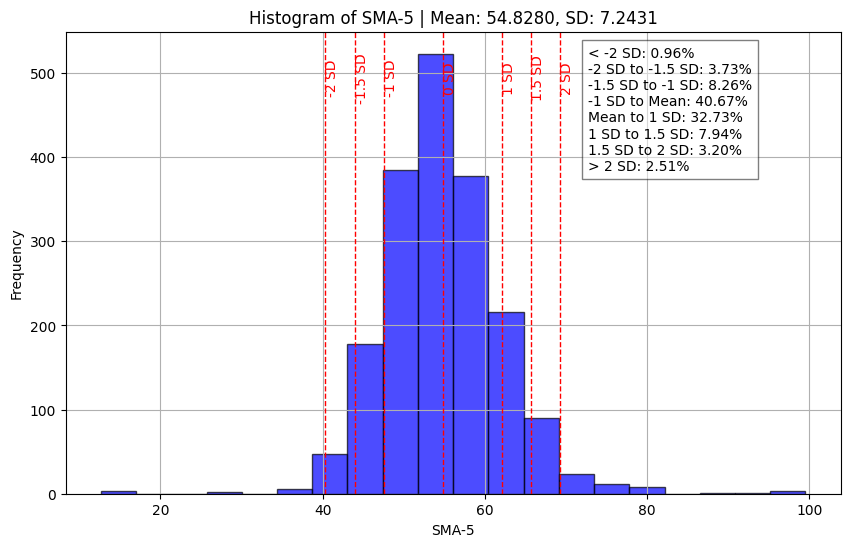

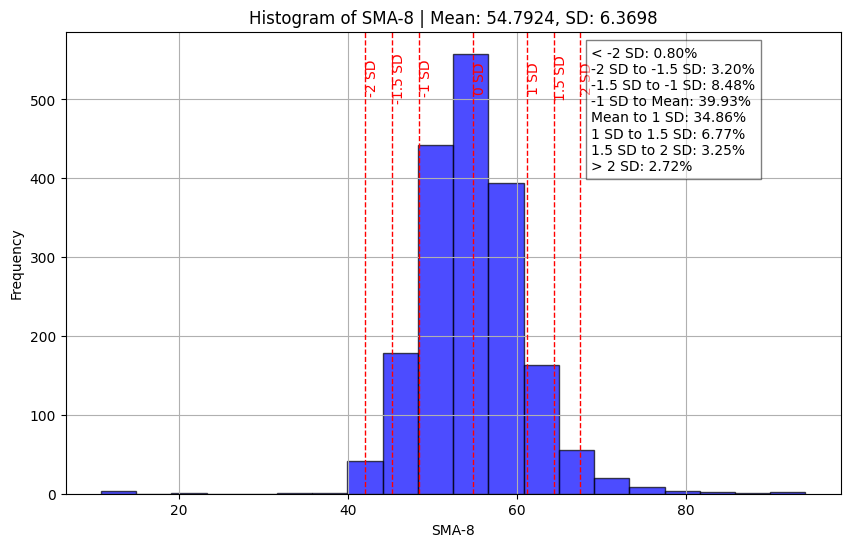

In [13]:
for column in columns_to_analyze:
    # Calculate mean and standard deviations
    mean = df[column].mean()
    std_dev = df[column].std()

    # Calculate percentages of data within specified ranges
    percent_less_than_minus_2sd = (df[column] < mean - 2 * std_dev).mean() * 100
    percent_minus_2sd_to_minus_1_5sd = (
        (df[column] >= mean - 2 * std_dev) & (df[column] < mean - 1.5 * std_dev)
    ).mean() * 100
    percent_minus_1_5sd_to_minus_1sd = (
        (df[column] >= mean - 1.5 * std_dev) & (df[column] < mean - 1 * std_dev)
    ).mean() * 100
    percent_minus_1sd_to_mean = (
        (df[column] >= mean - 1 * std_dev) & (df[column] < mean)
    ).mean() * 100
    percent_mean_to_1sd = (
        (df[column] >= mean) & (df[column] < mean + 1 * std_dev)
    ).mean() * 100
    percent_1sd_to_1_5sd = (
        (df[column] >= mean + 1 * std_dev) & (df[column] < mean + 1.5 * std_dev)
    ).mean() * 100
    percent_1_5sd_to_2sd = (
        (df[column] >= mean + 1.5 * std_dev) & (df[column] < mean + 2 * std_dev)
    ).mean() * 100
    percent_greater_than_2sd = (df[column] > mean + 2 * std_dev).mean() * 100

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=20, alpha=0.7, color="blue", edgecolor="black")
    plt.title(f"Histogram of {column} | Mean: {mean:.4f}, SD: {std_dev:.4f}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(True)

    # Overlay vertical lines and text annotations
    for i, sd in enumerate([-2, -1.5, -1, 0, 1, 1.5, 2]):
        plt.axvline(x=mean + sd * std_dev, color="red", linestyle="--", linewidth=1)
        plt.text(
            mean + sd * std_dev,
            plt.ylim()[1] * 0.9,
            f"{sd} SD",
            rotation=90,
            verticalalignment="center",
            color="red",
        )

    # Adding percentages text
    plt.text(
        plt.xlim()[1] * 0.7,
        plt.ylim()[1] * 0.7,
        f"< -2 SD: {percent_less_than_minus_2sd:.2f}%\n"
        f"-2 SD to -1.5 SD: {percent_minus_2sd_to_minus_1_5sd:.2f}%\n"
        f"-1.5 SD to -1 SD: {percent_minus_1_5sd_to_minus_1sd:.2f}%\n"
        f"-1 SD to Mean: {percent_minus_1sd_to_mean:.2f}%\n"
        f"Mean to 1 SD: {percent_mean_to_1sd:.2f}%\n"
        f"1 SD to 1.5 SD: {percent_1sd_to_1_5sd:.2f}%\n"
        f"1.5 SD to 2 SD: {percent_1_5sd_to_2sd:.2f}%\n"
        f"> 2 SD: {percent_greater_than_2sd:.2f}%",
        bbox=dict(facecolor="white", alpha=0.5),
    )

    plt.show()

In [14]:
results_df.to_csv("Analyze_MA.csv")